In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [4]:
df = pd.read_csv('../Akkapop/output/dengue_processed_for_regression.csv')
df

,year,Province,patient_count,humidity,temp_avg,temp_min,temp_max,rain_ml,rain_day
0,2016,Amnat Charoen,676,75.0,27.0,13.0,39.0,1638.0,130
1,2016,Ang Thong,286,75.0,27.0,13.0,39.0,1638.0,130
2,2016,Bangkok,14932,75.0,27.0,13.0,39.0,1638.0,130
3,2016,Bueng Kan,1266,75.0,27.0,13.0,39.0,1638.0,130
4,2016,Buri Ram,1500,76.6,27.4,8.5,43.2,1370.7,93
...,...,...,...,...,...,...,...,...,...
380,2020,Udon Thani,941,75.0,27.0,13.0,39.0,1638.0,130
381,2020,Uthai Thani,247,75.0,27.0,13.0,39.0,1638.0,130
382,2020,Uttaradit,587,75.0,27.0,13.0,39.0,1638.0,130
383,2020,Yala,436,75.0,27.0,13.0,39.0,1638.0,130


In [5]:
df = df.rename(columns={'province': 'Province'})
df

,year,Province,patient_count,humidity,temp_avg,temp_min,temp_max,rain_ml,rain_day
0,2016,Amnat Charoen,676,75.0,27.0,13.0,39.0,1638.0,130
1,2016,Ang Thong,286,75.0,27.0,13.0,39.0,1638.0,130
2,2016,Bangkok,14932,75.0,27.0,13.0,39.0,1638.0,130
3,2016,Bueng Kan,1266,75.0,27.0,13.0,39.0,1638.0,130
4,2016,Buri Ram,1500,76.6,27.4,8.5,43.2,1370.7,93
...,...,...,...,...,...,...,...,...,...
380,2020,Udon Thani,941,75.0,27.0,13.0,39.0,1638.0,130
381,2020,Uthai Thani,247,75.0,27.0,13.0,39.0,1638.0,130
382,2020,Uttaradit,587,75.0,27.0,13.0,39.0,1638.0,130
383,2020,Yala,436,75.0,27.0,13.0,39.0,1638.0,130


In [6]:
coord = pd.read_csv('../Nuttawut/thailand_lalong.csv')
coord

,Province,latitude,longitude
0,Amnat Charoen,15.5100,104.3800
1,Ang Thong,14.3500,100.3100
2,Bangkok,13.4500,100.3500
3,Bueng Kan,18.2300,103.3700
4,Buri Ram,15.0000,103.0000
...,...,...,...
72,Udon Thani,17.2900,102.4600
73,Uthai Thani,15.3835,100.0246
74,Uttaradit,17.3600,100.5000
75,Yala,6.5411,101.2804


In [7]:
df2 = pd.merge(df,coord,on='Province')
df2

,year,Province,patient_count,humidity,temp_avg,temp_min,temp_max,rain_ml,rain_day,latitude,longitude
0,2016,Amnat Charoen,676,75.0,27.0,13.0,39.0,1638.0,130,15.51,104.38
1,2017,Amnat Charoen,137,75.0,27.0,13.0,39.0,1638.0,130,15.51,104.38
2,2018,Amnat Charoen,199,75.0,27.0,13.0,39.0,1638.0,130,15.51,104.38
3,2019,Amnat Charoen,549,75.0,27.0,13.0,39.0,1638.0,130,15.51,104.38
4,2020,Amnat Charoen,166,75.0,27.0,13.0,39.0,1638.0,130,15.51,104.38
...,...,...,...,...,...,...,...,...,...,...,...
380,2016,Yasothon,686,75.0,27.0,13.0,39.0,1638.0,130,15.50,104.10
381,2017,Yasothon,187,75.0,27.0,13.0,39.0,1638.0,130,15.50,104.10
382,2018,Yasothon,409,75.0,27.0,13.0,39.0,1638.0,130,15.50,104.10
383,2019,Yasothon,870,75.0,27.0,13.0,39.0,1638.0,130,15.50,104.10


In [9]:
# np_coord = df2[['latitude', 'longitude','quant_rain']].to_numpy()
np_coord = df2[['latitude', 'longitude','rain_ml']].to_numpy()

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [12]:
kmeans.fit(np_coord)

KMeans(init='random', n_clusters=3, random_state=42)

In [13]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [14]:
centers =  kmeans.cluster_centers_
centers

array([[  15.51047419,  100.71095968, 1081.07822581],
       [   9.32568333,  100.65724444, 4161.10555556],
       [  13.58381235,  101.11951276, 1734.64485597]])

In [15]:
cluster = pd.DataFrame({'k_n':kmeans.labels_})
cluster

,k_n
0,2
1,2
2,2
3,2
4,2
...,...
380,2
381,2
382,2
383,2


In [16]:
df3 = df2.join(cluster)
df3

,year,Province,patient_count,humidity,temp_avg,temp_min,temp_max,rain_ml,rain_day,latitude,longitude,k_n
0,2016,Amnat Charoen,676,75.0,27.0,13.0,39.0,1638.0,130,15.51,104.38,2
1,2017,Amnat Charoen,137,75.0,27.0,13.0,39.0,1638.0,130,15.51,104.38,2
2,2018,Amnat Charoen,199,75.0,27.0,13.0,39.0,1638.0,130,15.51,104.38,2
3,2019,Amnat Charoen,549,75.0,27.0,13.0,39.0,1638.0,130,15.51,104.38,2
4,2020,Amnat Charoen,166,75.0,27.0,13.0,39.0,1638.0,130,15.51,104.38,2
...,...,...,...,...,...,...,...,...,...,...,...,...
380,2016,Yasothon,686,75.0,27.0,13.0,39.0,1638.0,130,15.50,104.10,2
381,2017,Yasothon,187,75.0,27.0,13.0,39.0,1638.0,130,15.50,104.10,2
382,2018,Yasothon,409,75.0,27.0,13.0,39.0,1638.0,130,15.50,104.10,2
383,2019,Yasothon,870,75.0,27.0,13.0,39.0,1638.0,130,15.50,104.10,2


In [14]:
# plt = sns.scatterplot(data=df3, x="latitude", y="longitude", hue="k_n" )
# plt.axis('equal')

In [15]:
#print(min(df3['latitude']),max(df3['latitude']),min(df3['longitude']),max(df3['longitude']))

In [17]:
# import map
ruh_m = plt.imread('img/map.jpg')

In [18]:
# Set edge
maps = pd.DataFrame(data={"lat":[97.313,105.785], "lon":[20.556,5.468]})
maps

,lat,lon
0,97.313,20.556
1,105.785,5.468


In [19]:
# Set map edge
BBox = ( maps['lat'].min(), 
         maps['lat'].max(),
         maps['lon'].min(), 
         maps['lon'].max())
BBox

(97.313, 105.785, 5.468, 20.556)

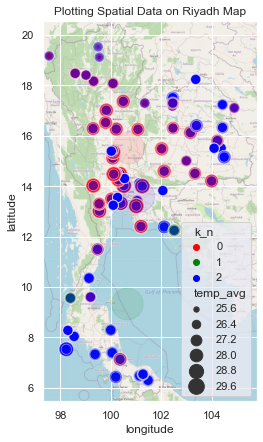

In [23]:
fig, ax = plt.subplots(figsize = (8,7))
hmax = sns.scatterplot(
    data=df3, x="longitude", y="latitude",
    hue="k_n" , palette=['red','green','blue'], 
    size="temp_avg" , sizes=(1,250) , alpha = 0.5 )
# ax.scatter(df3.longitude, df3.latitude, alpha=0.3, c=df3.k_n, s=df3.dead_perc*1000)
hmax.scatter(centers[:, 1], centers[:, 0], s=1000, alpha=0.1 , c=['red','green','blue'])
hmax.set_title('Plotting Spatial Data on Riyadh Map')
hmax.set_xlim(BBox[0],BBox[1])
hmax.set_ylim(BBox[2],BBox[3])
hmax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
